# clip cosine similarity

In [ ]:
    !pip install -U torch transformers

    import torch
    from torch.nn import CosineSimilarity
    from transformers import CLIPTokenizer, CLIPModel, CLIPTextModel
    cossim = CosineSimilarity(dim=0, eps=1e-6)

    def dist(v1, v2):
      return cossim(v1, v2)

In [ ]:
# torch_device = "cuda" if torch.cuda.is_available() else "cpu"
torch_device = "cpu"

models = [
    'openai/clip-vit-base-patch16',
    'openai/clip-vit-base-patch32',
    'openai/clip-vit-large-patch14',
]

model_id = models[1]

tokenizer = CLIPTokenizer.from_pretrained(model_id)
text_encoder = CLIPTextModel.from_pretrained(model_id).to(torch_device)
model = CLIPModel.from_pretrained(model_id).to(torch_device)

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

In [ ]:
instruction = [
  "Insert cracked walls and a fiery red sky.", "Add eerie shadows lurking.", "Scatter bugs on the walls.", "Add colorful balloons floating in the air.", "Place a large dying plant.", "happiness", "anger", "sadness", "fear", "disgust"
]

emotions = [
  "happiness", "anger", "sadness", "fear", "disgust"
]

text_inputs = tokenizer(
    instruction,
    padding="max_length",
    return_tensors="pt",
    ).to(torch_device)
text_features = model.get_text_features(**text_inputs)
text_embeddings = torch.flatten(text_encoder(text_inputs.input_ids.to(torch_device))['last_hidden_state'],1,-1)


In [ ]:
# print("\n\nusing text_features")
# for i1, label1 in enumerate(instruction):
#   for i2, label2 in enumerate(instruction):
#     if (i2>=i1):
#       print(f"{label1} <-> {label2} = {dist(text_features[i1], text_features[i2]):.4f}")

print("\n\nusing text_embeddings")
for i1, label1 in enumerate(instruction):
  for i2, label2 in enumerate(instruction):
    if (i2>=i1):
      print(f"{label1} <-> {label2} = {dist(text_embeddings[i1], text_embeddings[i2]):.4f}")



# hugg. transformer

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("bhadresh-savani/distilbert-base-uncased-emotion")
model = AutoModelForSequenceClassification.from_pretrained("bhadresh-savani/distilbert-base-uncased-emotion")

def classify_emotion(text):
    # Encode text
    inputs = tokenizer(text, return_tensors="pt")
    # Predict
    with torch.no_grad():
        logits = model(**inputs).logits
    # Softmax to get probabilities
    probabilities = torch.nn.functional.softmax(logits, dim=1)
    # Get the highest probability emotion
    predicted_emotion = model.config.id2label[probabilities.argmax().item()]
    if predicted_emotion == "love":
      predicted_emotion = "happiness"
    return predicted_emotion

# Example usage
instruction = "I am furious about the situation."
emotion = classify_emotion(instruction)
print(f"Predicted Emotion: {emotion}")


Predicted Emotion: anger


In [ ]:
# Assuming 'data' is a list of tuples (text, actual_emotion)
data = [
    ("Imagine being falsely accused during a critical meeting.", "anger"),
    ("Think about a scenario where your project is sabotaged by a jealous colleague.", "anger"),
    ("Recall a time when you were denied a well-deserved promotion.", "anger"),
    ("Consider how you'd react if someone destroyed your garden out of spite.", "anger"),
    ("Remember feeling helpless when someone scammed you online.", "anger"),
    ("Picture the moment when you find out you've won a prestigious award.", "joy"),
    ("Imagine your favorite author dedicating a book to you.", "joy"),
    ("Think about the day you finally adopt a pet you've always wanted.", "joy"),
    ("Recall the feeling of passing an extremely difficult and important exam.", "joy"),
    ("Visualize the moment when your partner surprises you with a dream vacation.", "joy"),
    ("Remember the sadness of watching your childhood home being demolished.", "sadness"),
    ("Imagine the heartache of a cherished friendship suddenly ending.", "sadness"),
    ("Think about the moment you realize a treasured keepsake has been lost forever.", "sadness"),
    ("Recall the feelings of grief at a memorial service for a loved one.", "sadness"),
    ("Consider the deep loneliness of celebrating a major milestone alone.", "sadness"),
    ("Envision waking up to the sound of an intruder in your house.", "fear"),
    ("Imagine being stranded in the wilderness as night falls with no help in sight.", "fear"),
    ("Think about the panic of being caught in a crowd stampede.", "fear"),
    ("Recall the dread you feel as you walk down a dark, deserted alley.", "fear"),
    ("Picture the fear of finding a snake in your bed as you pull back the covers.", "fear"),

]

correct_predictions = 0
for text, actual_emotion in data:
    predicted_emotion = classify_emotion(text)
    print(f"Predicted Emotion: {predicted_emotion}, Actual Emotion: {actual_emotion}")
    if predicted_emotion == actual_emotion:
        correct_predictions += 1

accuracy = correct_predictions / len(data)
print(f"Accuracy: {accuracy:.2f}")


Predicted Emotion: anger, Actual Emotion: anger
Predicted Emotion: anger, Actual Emotion: anger
Predicted Emotion: sadness, Actual Emotion: anger
Predicted Emotion: sadness, Actual Emotion: anger
Predicted Emotion: fear, Actual Emotion: anger
Predicted Emotion: joy, Actual Emotion: joy
Predicted Emotion: joy, Actual Emotion: joy
Predicted Emotion: joy, Actual Emotion: joy
Predicted Emotion: sadness, Actual Emotion: joy
Predicted Emotion: joy, Actual Emotion: joy
Predicted Emotion: sadness, Actual Emotion: sadness
Predicted Emotion: joy, Actual Emotion: sadness
Predicted Emotion: joy, Actual Emotion: sadness
Predicted Emotion: joy, Actual Emotion: sadness
Predicted Emotion: joy, Actual Emotion: sadness
Predicted Emotion: fear, Actual Emotion: fear
Predicted Emotion: fear, Actual Emotion: fear
Predicted Emotion: fear, Actual Emotion: fear
Predicted Emotion: fear, Actual Emotion: fear
Predicted Emotion: fear, Actual Emotion: fear
Accuracy: 0.60


In [ ]:
from transformers import pipeline
import numpy as np




In [ ]:
# Step 2: Load the emotion classification model
model_name = 'bhadresh-savani/distilbert-base-uncased-emotion'
emotion_classifier = pipeline('text-classification', model=model_name)

In [ ]:
# Define a mapping from model outputs to your target categories
emotion_mapping = {
    'joy': 'happiness',
    'love': 'sadness',  # Assuming you want to ignore or handle 'love' differently
    'anger': 'anger',
    'fear': 'fear',
    'sadness': 'sadness',
    'surprise' : 'anger'
}


In [ ]:
# Step 3: Classify each instruction and collect predictions
predictions = []
for text, actual_label in data:
    prediction = emotion_classifier(text)
    # predicted_label = prediction[0]['label'].lower()
    predicted_label = prediction[0]['label']
    mapped_label = emotion_mapping.get(predicted_label, None)
    if mapped_label is None:
        print(f"Warning: Unknown label '{predicted_label}'")
    predictions.append((mapped_label, actual_label))
    # if mapped_label != actual_label:
    #     print(f"og = {predicted_label} \t\tPrediction: {mapped_label}, \t\t Actual Label: {actual_label}")

# Step 4: Calculate accuracy
correct_predictions = sum(1 for predicted, actual in predictions if predicted == actual)
accuracy = correct_predictions / len(data)

print(f"Accuracy: {accuracy:.2f}")
# print("Predictions:", predictions)


Accuracy: 0.60


# evaluate pix-pix baseline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


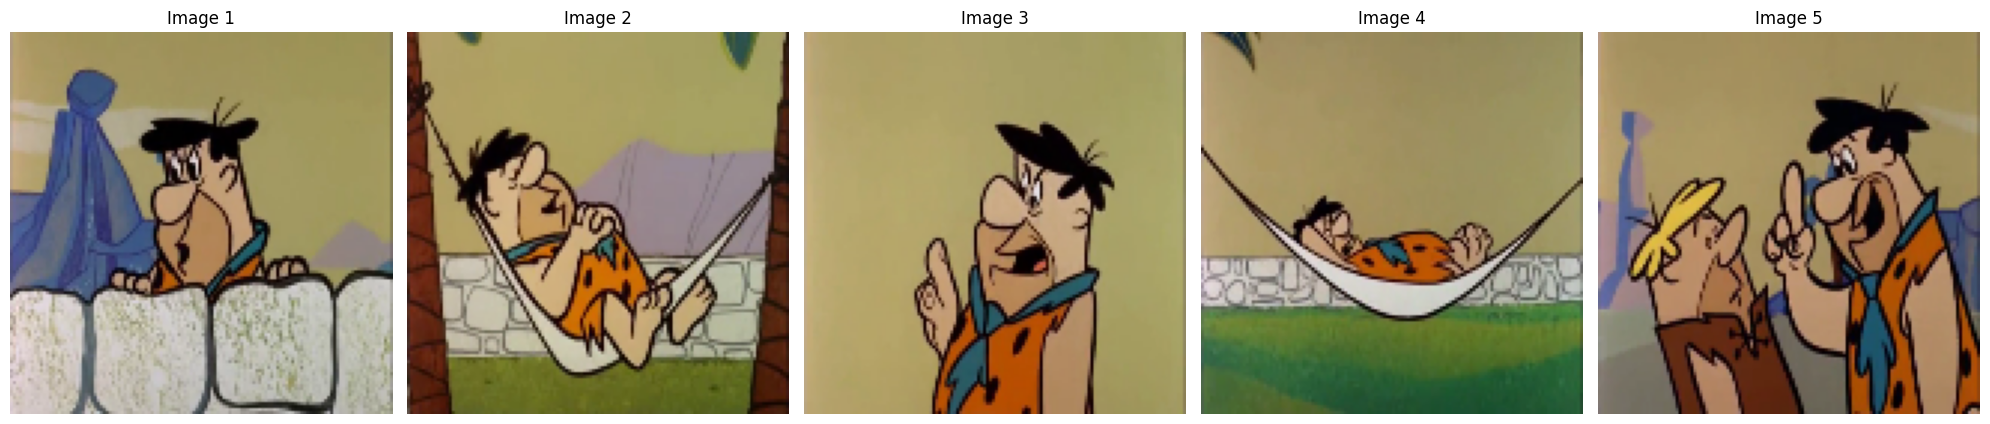

In [ ]:
# @title first 5 images
import numpy as np
import matplotlib.pyplot as plt
import os

def load_and_visualize_images(directory):
    # Check if directory exists
    if not os.path.exists(directory):
        raise ValueError(f"Directory {directory} does not exist")

    # List all .npy files in the directory
    npy_files = [file for file in os.listdir(directory) if file.endswith('.npy')]

    #


    # Take the first 10 .npy files
    npy_files = npy_files[:5]

    # Set up the plot for multiple images
    fig, axes = plt.subplots(1, len(npy_files), figsize=(20, 5))  # Adjusted figsize for better visibility

    # Loop through the sorted list of files
    for i, file in enumerate(npy_files):
        # Construct full file path
        file_path = os.path.join(directory, file)

        # Load the .npy file
        image_array = np.load(file_path)

        # Select the first image in the first dimension (assuming index 0 is representative)
        image_to_show = image_array[0]  # Choose index 0 from the first dimension

        # Visualize the image
        ax = axes[i] if len(npy_files) > 1 else axes
        ax.imshow(image_to_show)  # Removed cmap='gray' as these are color images
        ax.axis('off')
        ax.set_title(f'Image {i+1}')

    # Show all plots
    plt.tight_layout()
    plt.show()

# Usage example: Update the 'your_directory_path' with your actual directory path containing .npy files
directory_path = '/content/drive/MyDrive/KAUST/Generative_AI/StoryGPT-V/data/flintstones/video_frames_sampled'
load_and_visualize_images(directory_path)


In [ ]:
# @title load data
import numpy as np
import os

def load_images_to_array(directory, num_images=100):
    # Check if the directory exists
    if not os.path.exists(directory):
        raise ValueError(f"Directory {directory} does not exist")

    # List all .npy files in the directory
    npy_files = [file for file in os.listdir(directory) if file.endswith('.npy')]

    # # Sort files to maintain consistency; optional
    # npy_files.sort()

    # Limit to the first 100 files (or fewer, if there aren't 100 files)
    npy_files = npy_files[:num_images]

    # Create a list to store the image data
    images_list = []

    # Loop through the sorted list of files
    for file in npy_files:
        # Construct full file path
        file_path = os.path.join(directory, file)

        # Load the .npy file
        image_array = np.load(file_path)

        # Select the first image in the first dimension and append to list
        images_list.append(image_array[0])

    # Convert list to a NumPy array
    all_images_array = np.array(images_list)

    return all_images_array

# Usage example: Update the 'your_directory_path' with your actual directory path containing .npy files
directory_path = '/content/drive/MyDrive/KAUST/Generative_AI/StoryGPT-V/data/flintstones/video_frames_sampled'
data = load_images_to_array(directory_path)


In [ ]:
data.shape

(100, 128, 128, 3)

In [ ]:
# @title zipfile recover
import zipfile
from PIL import Image
import json
import io

def load_from_zip(zip_filename):
    with zipfile.ZipFile(zip_filename, 'r') as myzip:
        images = []
        # Iterate over each file in the ZIP
        for filename in myzip.namelist():
            if filename.endswith('_original.png') or filename.endswith('_transformed.png'):
                # Extract the image
                image_data = myzip.read(filename)
                image = Image.open(io.BytesIO(image_data))
                image.load()  # Load image data

                # Extract corresponding metadata
                base_name = filename.rsplit('_', 1)[0]  # Remove the last part after '_'
                metadata_file = f"{base_name}_data.json"
                metadata_data = myzip.read(metadata_file)
                metadata = json.loads(metadata_data)

                # Reconstruct the tuple format
                if '_original.png' in filename:
                    type_img = 'original'
                else:
                    type_img = 'transformed'

                images.append((image, metadata['response'], type_img, metadata['emotion'], metadata['description']))
        return images

# Example usage
zip_filename = 'output_images.zip'
recovered_images = load_from_zip(zip_filename)

images = []
data = []

for img, response, type_img, emotion, description in recovered_images:
    # print(f"Type: {type_img}, Emotion: {emotion}, Description: {description}, Response: {response}")
    # display(img)  # This will display the image
    images.append((img, response, type_img, emotion, description))
    data.append((response, emotion))



In [ ]:
import torch
import clip
import numpy as np
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset  # Added Dataset import
from PIL import Image
import os

# Load the CLIP model
# device = "cuda" if torch.cuda.is_available() else "cpu"
device = "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

def get_clip_embeddings(dataloader):
    embeddings = []
    with torch.no_grad():
        for images in dataloader:
            images = images.to(device)
            emb = model.encode_image(images)
            embeddings.append(emb)
    return torch.cat(embeddings)

def calculate_cosine_similarity(embeddings1, embeddings2):
    embeddings1 = embeddings1 / embeddings1.norm(dim=-1, keepdim=True)
    embeddings2 = embeddings2 / embeddings2.norm(dim=-1, keepdim=True)
    similarity = torch.matmul(embeddings1, embeddings2.T)
    return similarity

def encode_text(text):
    with torch.no_grad():
        text_tokens = clip.tokenize([text]).to(device)
        text_embeddings = model.encode_text(text_tokens)
        return text_embeddings

class ImageDataset(Dataset):
    def __init__(self, directory, transform=None):
        self.directory = directory
        self.transform = transform
        if not os.path.exists(directory):
            raise ValueError(f"Directory {directory} does not exist")
        self.image_paths = [os.path.join(directory, filename) for filename in os.listdir(directory) if filename.endswith(('.png', '.jpg', '.jpeg'))]

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image

def get_transform():
    return transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.48145466, 0.4578275, 0.40821073], std=[0.26862954, 0.26130258, 0.27577711])
    ])

import numpy as np

# Store results in the comparison_results dictionary and accumulate values for averages
total_cosine_similarity = []
total_clip_score = []

for emotion in emotions:
    output_image_dir = './data/to/aff_jpg_cpy/' + emotion
    output_dataloader = create_dataloader(output_image_dir, batch_size=32)
    output_embeddings = get_clip_embeddings(output_dataloader)

    # Calculate cosine similarity between input and output embeddings
    cos_similarity_output_input = calculate_cosine_similarity(input_embeddings, output_embeddings).cpu().numpy()

    # Encode the emotion text
    emotion_text_embedding = encode_text(emotion)
    clip_score_emotion_output = calculate_cosine_similarity(emotion_text_embedding, output_embeddings).cpu().numpy()

    # Store results and accumulate values
    comparison_results[emotion] = {
        'Cosine Similarity': np.mean(cos_similarity_output_input),
        'CLIP Score with Emotion': np.mean(clip_score_emotion_output)
    }
    total_cosine_similarity.append(comparison_results[emotion]['Cosine Similarity'])
    total_clip_score.append(comparison_results[emotion]['CLIP Score with Emotion'])

# Calculate overall averages
average_cosine_similarity = np.mean(total_cosine_similarity)
average_clip_score = np.mean(total_clip_score)

# Print the overall averages
print(f"Overall Average Cosine Similarity: {average_cosine_similarity:.4f}")
print(f"Overall Average CLIP Score with Emotion: {average_clip_score:.4f}")


ModuleNotFoundError: No module named 'clip'